In [8]:
import os
import os.path as osp
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import transforms
from Model.PSPNet_Custom import *

In [2]:
inputdir = r'Data\Train_dataset'
outputdir = r'Predict'

In [3]:
# device= torch.device("cuda" if torch.cuda.is_available() else "cpu")
# num_classes = 6
# class_weights = torch.tensor([0.71527965, 0.77025329, 0, 0.82428098, 1.10154846, 30.43413])
# loss_fn = torch.nn.CrossEntropyLoss(weight=class_weights, reduction='mean').to(device)
# model = PSPNet_Custom(classes=num_classes, criterion=loss_fn, pretrained=True)
# model_path = r'Training_result\ModelSave\PSPNet_Custom10.pth'

# checkpoint = torch.load(model_path, map_location = 'cpu')     
# model.load_state_dict(checkpoint["model"])
# model = model.to(device)

# tf = transforms.Compose([
#     transforms.Resize(1024),
#     transforms.ToTensor(),
#     transforms.Normalize(mean=[0.485, 0.456, 0.406],
#                             std=[0.229, 0.224, 0.225])
# ])
# with torch.no_grad():
#     model.eval()
#     grade = {}
#     for imgfile in os.listdir(inputdir):
#         data = Image.open(osp.join(inputdir, imgfile))
#         w = data.width
#         h = data.height
#         data = tf(data)
#         data = data.to(device).unsqueeze(0)
#         y= model(data)
#         y = y.argmax(dim=1).cpu().squeeze().numpy().astype(np.uint8)

#         y[y == 2] = 6
#         result = Image.fromarray(y)
#         result = transforms.Resize((h, w))(result)
#         result.save(osp.join(outputdir, imgfile))
# print('Done')

Done


In [9]:
def show_mask(image, predict_mask):
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    fig.tight_layout(pad=3)

    ax[0].imshow(image)
    ax[0].set_title('Image')
    ax[1].imshow(predict_mask, cmap='jet')
    plt.show()

slide002_core017.jpg 
 slide002_core017.jpg


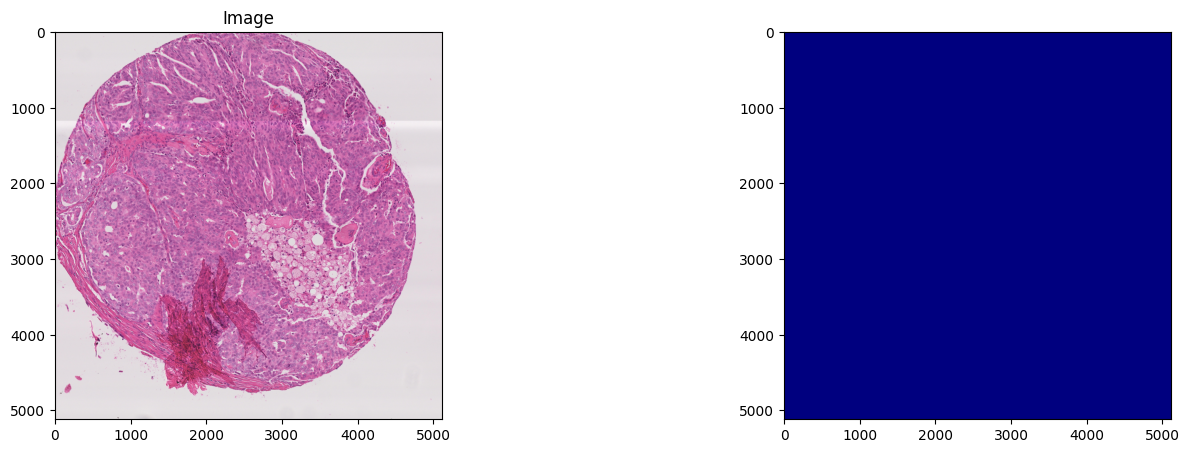

In [10]:
img_file = os.listdir(r'Data\Train_dataset')
mask_file = os.listdir(r'Predict')

img_name = np.random.choice(img_file)
mask_name = img_name#.replace('.jpg', '_classimg_nonconvex.png')
print(img_name, '\n',mask_name)
img = Image.open(osp.join(inputdir, img_name))
mask = Image.open(osp.join(outputdir, mask_name))
show_mask(img, mask)